# Pymaceuticals Inc.
---

### Analysis

- There is a positive correlation of 0.84 between mouse weight (g) and tumor size (mm3). This pvalue of 0.84 illustrates a linear correlation displayed in the scatterplot at the end of this analysis. Suggesting that in order to reduce tumor size in mice, a healthy weight is essential.
- The most effective drug regimen is Capomulin in treating tumor size (mm3). For mouse Y793 tumor size decreased over time under the Capomulin regime
- The least effective drug was Infubinol which was the only treatment with outliers, placing some doubt around the treatment, Ramicane was the third least effective treatment compared to Capomulin, Ceftamin was also an effective treatment. Capomulin and Ceftamin could be recommended as effective treatment regimes in mice and possibly ready for human trials.
 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how = "outer", on="Mouse ID")

# Display the data table for preview
df.head()
df.shape

(1893, 8)

In [2]:
# Checking the number of mice.
df["Mouse ID"].value_counts()


g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_df = df.set_index("Mouse ID")



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(["g989"])

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df.shape

(1880, 7)

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = clean_df.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumour_mean = tumor["Tumor Volume (mm3)"].mean()
tumor_median = tumor["Tumor Volume (mm3)"].median()
tumor_var = tumor["Tumor Volume (mm3)"].var()
tumor_std = tumor["Tumor Volume (mm3)"].std()
tumor_sem = tumor["Tumor Volume (mm3)"].sem()

tumor_df = pd.DataFrame({
                        "Mean": tumour_mean,
                        "Median" : tumor_median,
                        "Variance": tumor_var,
                        "Standard Deviation": tumor_std,
                        "SEM": tumor_sem,
})

tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor2 = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

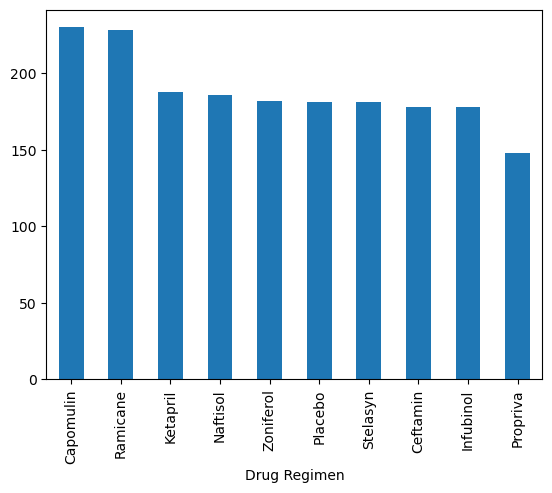

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
timepoint.sort_values(ascending=False).plot.bar()

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

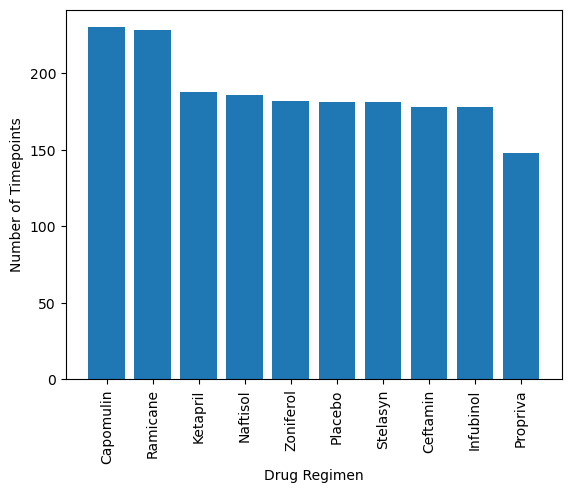

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_desc = timepoint.sort_values(ascending=False)
plt.bar(timepoint_desc.index, timepoint_desc.values)
plt.ylabel("Number of Timepoints", size=10)
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.show


<Axes: ylabel='Sex'>

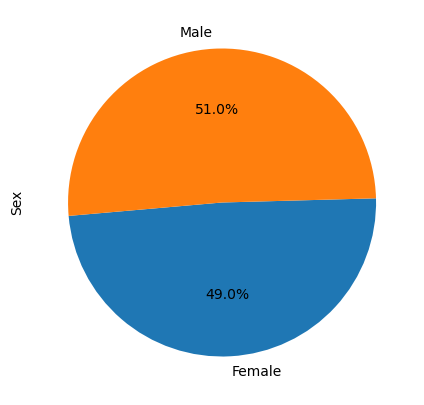

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df.groupby(["Sex"])["Sex"].count()

sex.plot.pie(startangle=185,autopct="%1.1f%%", figsize =(5, 5))

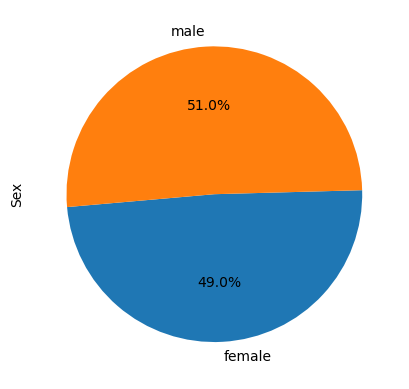

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=("female", "male"), startangle=185, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tm = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_tm = pd.DataFrame(last_tm)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(clean_df, last_tm, on=("Mouse ID", "Timepoint"))
last_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
z314,Stelasyn,Female,21,28,5,45.934712,0
z435,Propriva,Female,12,26,10,48.710661,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = last_df.loc[last_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset 

    tumor_vol_list.append(final_tumor_vol)
   
    # Determine outliers using upper and lower bounds
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    outlier_occupancy = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(outlier_occupancy)
    if not outlier_occupancy.empty:
        print(f"{drug} has outliers")
    else:
        print(f"{drug} has no outliers")
        

# We need to sort the data to determine which could be outliers
#treatment_list.sort()
#print(treatment_list)

#need to print these results
#final_tumor_vol

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin has no outliers
The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane has no outliers
The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Value

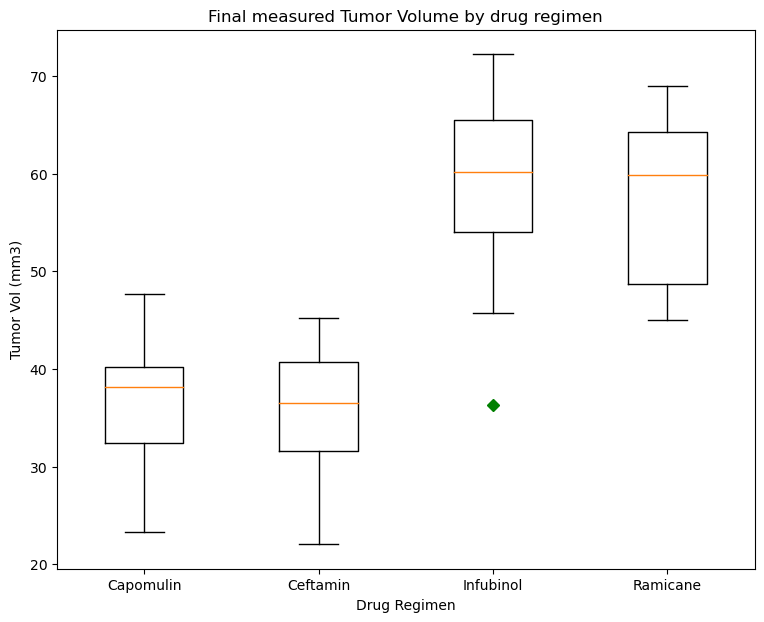

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = tumor_vol_list
#plt.boxplot(final_tumor_vol, showmeans=True)
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor Volume by drug regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatment_list)
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

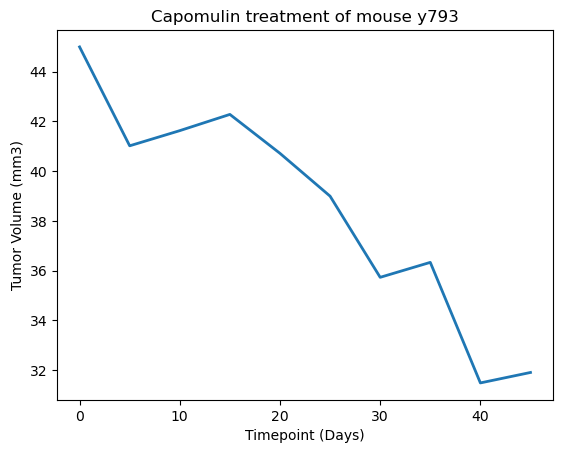

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = clean_df.loc["y793"]
line_df

x_axisTP = line_df["Timepoint"]
tumorsize = line_df["Tumor Volume (mm3)"]

#plt.scatter(x_axisTP, tumorsize, marker="o", facecolors="red", edgecolors="black", s=x_axisTP, alpha=0.75)

plt.title('Capomulin treatment of mouse y793')
plt.plot(x_axisTP, tumorsize,linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('linechart')
plt.show()

C:\Users\becsh\AppData\Local\Temp\ipykernel_23516\1253171239.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capavg = cap_df.groupby(["Mouse ID"]).mean()


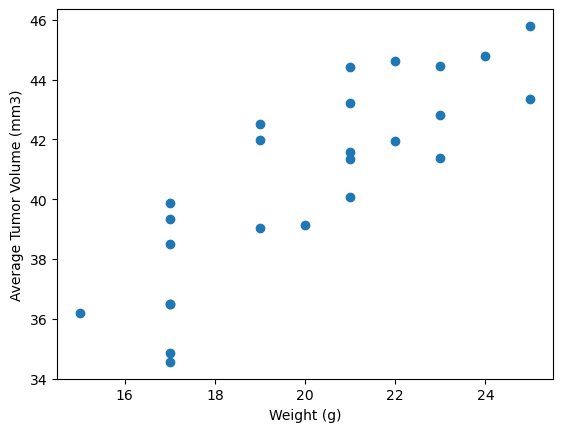

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

capavg = cap_df.groupby(["Mouse ID"]).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig('scatterplot')
plt.show()
capavg
 

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")



The correlation between mouse weight and average tumor volume is 0.84


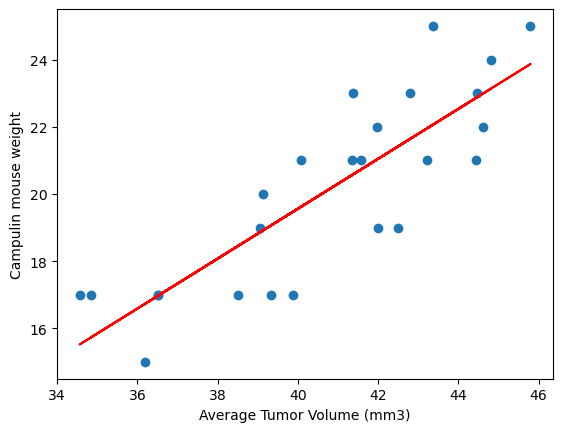

In [49]:
#Plot the linear regression model on top of the previous scatter plot
x_values = capavg['Tumor Volume (mm3)']
y_values = capavg['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Campulin mouse weight')
plt.show()